# Twitter Data Sentiment Analysis

### Link for study : https://stepupanalytics.com/sentiment-analysis-on-narendra-modis-tweets-using-python/#prettyPhoto

In [1]:
%matplotlib inline
import tweepy
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


## Creating a twitter app for @user

In [2]:
# Access
#acces_token='966289632815144960-7BYnTY1ABbykfiNJNkZtjfhfmJfSsUl'
#acces_token_secret='irZDHPTcMNYSikwCI9UohSlayGbGcLVEccvGptwaWOyil'

#Consumer
#consumer_key='enMyXDNHgcbBiRMUv9TfPHRW9'
#consumer_secret='Yp4e9s856kllbT5JyZYxL1Pk4i88R9Mk9FaJT7rH0nBHlGO3Ks'
# Access
acces_token='1189193716210126851-BctMQL5GbsbCBE096ihwyfVIFOme84'
acces_token_secret='e78h2f2X1GjXEMyfX064OAotIrOT0C7F8LYIV5AYKPXWT'

#Consumer
consumer_key='L3RNiywgtzucRJBT3YH44g3yZ'
consumer_secret='el1NLHZMsjXPdP6j4GDcOqoJcSZsjXX4ZkqFUci255VKd1CTWV'

In [5]:
# We import our access keys:
 
def twitter_setup():
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(acces_token, acces_token_secret)
    
    api = tweepy.API(auth)
    return api

## Tweet Extraction

In [6]:
extractor = twitter_setup()
 
tweets = extractor.user_timeline(screen_name="NarendraModi", count = 200)
tweets=[tweet for tweet in tweepy.Cursor(extractor.user_timeline,screen_name="NarendraModi").items()]
print("number of tweets extracted: {}.\n".format(len(tweets)))
 
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

number of tweets extracted: 3250.

5 recent tweets:

This morning I had a wonderful interaction with our athletes who are all set to represent India at the 2022 CWG. We… https://t.co/RFVOLEQddI

இதைக் கண்டபோது நான் பெருமகிழ்ச்சியும் உவகையும் கொண்டேன். ஒரே இந்தியா உன்னத இந்தியா கோட்பாட்டை அடுத்த நிலைக்கு எடுத்… https://t.co/3bkqUL1Cvj

Glad to have met PT Usha Ji in Parliament. @PTUshaOfficial https://t.co/maRxU3cfYb

I am delighted and proud to see this. Kudos to these shining stars of our Yuva Shakti from Arunachal Pradesh for fu… https://t.co/HPzCX5hpWz

India's vaccination drive is big on speed and scale. It has been powered by collective efforts of many, including s… https://t.co/03GjRjFmiM



## Creating a (pandas) DataFrame

In [7]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
 
display(data.head(10))

,tweets
0,This morning I had a wonderful interaction wit...
1,இதைக் கண்டபோது நான் பெருமகிழ்ச்சியும் உவகையும்...
2,Glad to have met PT Usha Ji in Parliament. @PT...
3,I am delighted and proud to see this. Kudos to...
4,India's vaccination drive is big on speed and ...
5,Wishing our dynamic contingent the very best f...
6,"At 10 AM tomorrow, 20th July, will be interact..."
7,The great Mangal Pandey is synonymous with cou...
8,Anguished by the passing away of Shri Bhupinde...
9,आत्मनिर्भर भारत के लिए जैसे हम Whole of the Go...


In [8]:
data.columns,data.shape,data.dtypes,data.head()

(Index(['tweets'], dtype='object'),
 (3250, 1),
 tweets    object
 dtype: object,
                                               tweets
 0  This morning I had a wonderful interaction wit...
 1  இதைக் கண்டபோது நான் பெருமகிழ்ச்சியும் உவகையும்...
 2  Glad to have met PT Usha Ji in Parliament. @PT...
 3  I am delighted and proud to see this. Kudos to...
 4  India's vaccination drive is big on speed and ...)

In [9]:
# We print info from the first tweet:
 
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1549773657870049283
2022-07-20 15:10:08+00:00
Twitter Media Studio
8325
2063
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/RFVOLEQddI', 'expanded_url': 'https://twitter.com/i/web/status/1549773657870049283', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [10]:
# We add relevant data
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [11]:
display(data.head(10))

,tweets,len,ID,Date,Source,Likes,RTs
0,This morning I had a wonderful interaction wit...,140,1549773657870049283,2022-07-20 15:10:08+00:00,Twitter Media Studio,8325,2063
1,இதைக் கண்டபோது நான் பெருமகிழ்ச்சியும் உவகையும்...,140,1549721166922756097,2022-07-20 11:41:33+00:00,Twitter for iPhone,9918,2825
2,Glad to have met PT Usha Ji in Parliament. @PT...,82,1549682995485089792,2022-07-20 09:09:52+00:00,Twitter for iPhone,45989,5266
3,I am delighted and proud to see this. Kudos to...,140,1549682762139205632,2022-07-20 09:08:56+00:00,Twitter for iPhone,18492,4501
4,India's vaccination drive is big on speed and ...,140,1549682495716982785,2022-07-20 09:07:53+00:00,Twitter for iPhone,14927,3656
5,Wishing our dynamic contingent the very best f...,89,1549614342538416128,2022-07-20 04:37:04+00:00,Twitter Media Studio,12461,3919
6,"At 10 AM tomorrow, 20th July, will be interact...",140,1549420567421685760,2022-07-19 15:47:04+00:00,Twitter for iPhone,21089,4489
7,The great Mangal Pandey is synonymous with cou...,139,1549235617414135809,2022-07-19 03:32:09+00:00,Twitter for iPhone,49343,8579
8,Anguished by the passing away of Shri Bhupinde...,140,1549090020832813056,2022-07-18 17:53:36+00:00,Twitter for iPhone,33735,5602
9,आत्मनिर्भर भारत के लिए जैसे हम Whole of the Go...,140,1549045416138010626,2022-07-18 14:56:21+00:00,Twitter Media Studio,14126,4551


In [12]:
data.to_csv('Narendra_Modi_Latest')
data.columns

Index(['tweets', 'len', 'ID', 'Date', 'Source', 'Likes', 'RTs'], dtype='object')

In [13]:
# Visualization and basic stats
 
# We extract the mean of length
 
mean = np.mean(data['len'])
print("the length's average in tweets: {}".format(mean))

the length's average in tweets: 127.54646153846154


In [14]:
# We extract the tweet with more FAVs and mote RTs:
 
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])
 
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]
 
# Max FAVs:
print("the tweet with more likes is: \n{}".format(data['tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} character.\n".format(data['len'][fav]))
 
# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} character.\n".format(data['len'][rt]))

the tweet with more likes is: 
Took blessings of my mother today as she enters her 100th year... https://t.co/lTEVGcyzdX
Number of likes: 305405
89 character.

The tweet with more retweets is: 
Gen Bipin Rawat was an outstanding soldier. A true patriot, he greatly contributed to modernising our armed forces… https://t.co/aUyn7tlnST
Number of retweets: 39322
139 character.



In [15]:
tlen = pd.Series(data = data['len'].values)   #, index=data['Data'])
tfav = pd.Series(data = data['Likes'].values)   #, index=data['Data'])
tret = pd.Series(data = data['RTs'].values) #, index=data['Data']

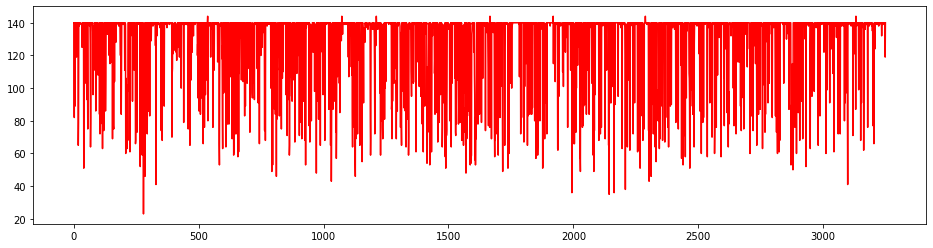

In [16]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

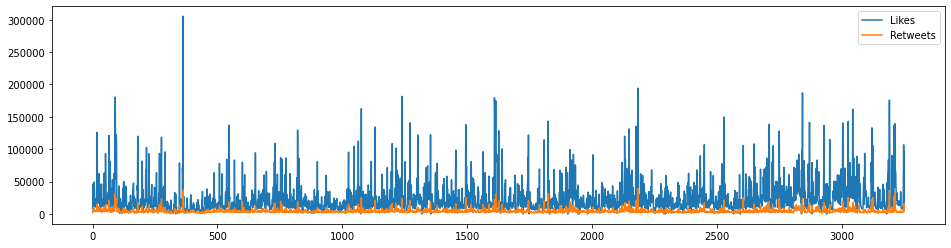

In [17]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

## Pie Chart of Sources

In [18]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
 
# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Media Studio
* Twitter for iPhone
* Twitter Web App


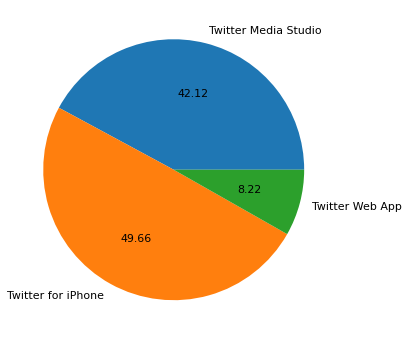

In [19]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))
 
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
 
percent /= 100
 
# Pie chart:
pie_chart = pd.Series(percent, index=sources,name='')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

# Sentiment Analysis

In [20]:
import textblob
import re
 
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = textblob.TextBlob(clean_tweet(tweet))
    #return str(analysis.sentiment.polarity)
    if analysis.sentiment.polarity == 0:
        return 0
    elif analysis.sentiment.polarity > 0:
        return 1
    else:
        return -1

In [21]:
l=[]
for tweet in data['tweets']:
    l.append(analize_sentiment(tweet))

In [22]:
data['SA']=np.array(l)

In [23]:
data.head()

,tweets,len,ID,Date,Source,Likes,RTs,SA
0,This morning I had a wonderful interaction wit...,140,1549773657870049283,2022-07-20 15:10:08+00:00,Twitter Media Studio,8325,2063,1
1,இதைக் கண்டபோது நான் பெருமகிழ்ச்சியும் உவகையும்...,140,1549721166922756097,2022-07-20 11:41:33+00:00,Twitter for iPhone,9918,2825,0
2,Glad to have met PT Usha Ji in Parliament. @PT...,82,1549682995485089792,2022-07-20 09:09:52+00:00,Twitter for iPhone,45989,5266,1
3,I am delighted and proud to see this. Kudos to...,140,1549682762139205632,2022-07-20 09:08:56+00:00,Twitter for iPhone,18492,4501,1
4,India's vaccination drive is big on speed and ...,140,1549682495716982785,2022-07-20 09:07:53+00:00,Twitter for iPhone,14927,3656,1


## Analyzing the result

In [24]:
# We construct lists with classified tweets:
 
pos_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] < 0]

In [25]:
# We print percentages:
 
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['tweets'])))

Percentage of positive tweets: 35.723076923076924%
Percentage of neutral tweets: 59.63076923076923%
Percentage of negative tweets: 4.6461538461538465%


In [26]:
p=(len(pos_tweets)*100/len(data['tweets']))
ne=(len(neu_tweets)*100/len(data['tweets']))
n=(len(neg_tweets)*100/len(data['tweets']))

In [27]:
d=[p,ne,n]
l=['Positive Sentiments','Neutral_Sentiments','Negative_Sentiments']

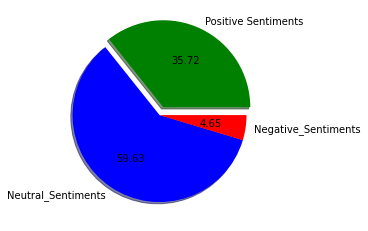

In [28]:
plt.pie(d,labels=l,autopct="%0.2f",shadow=True,explode=(0.1,0,0),colors=['green','blue','red'])
#plt.title("Sentiment Analysis on PM Narendra Modi's Tweets",size=25)
plt.show()


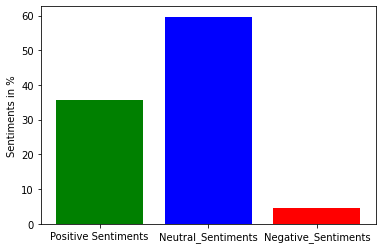

In [29]:
plt.bar(l,d,color=['green','blue','red'])
#plt.title("Sentiment Analysis on PM Narendra Modi's Tweets",size=15)
plt.ylabel("Sentiments in %")
plt.show()